In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number 
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession 

#create session
spark = SparkSession.builder.appName("IPL Data Analysis")\
.config("spark.jars.packages", "graphframes:graphframes:0.6.0-spark3.0-s_2.12") \
.getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


ball_by_ball_df = spark.read.schema(ball_by_ball_schema)\
  .format("csv")\
  .option("header","true")\
  .load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")


In [0]:
ball_by_ball_df.show(2)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).\
format("csv").\
option("header","true").\
option('path','s3://ipl-data-analysis-project/Match.csv').\
load()

match_df.show(10)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab|

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).\
format("csv").\
option("header","true").\
load("s3://ipl-data-analysis-project/Player.csv")

player_df.show(10)


+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|    Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|       R Dravid|null|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|       W Jaffer|null|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|        V Kohli|null|Right-hand bat|    Right-arm medium|  

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema)\
  .format("csv")\
  .option("header","true")\
  .load("s3://ipl-data-analysis-project/Player_match.csv")

player_match_df.show(10)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|        

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).\
format("csv").\
option("header","true").\
load("s3://ipl-data-analysis-project/Team.csv")

team_df.show()

+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
|      5|      6|    Delhi Daredevils|
|      6|      7|      Mumbai Indians|
|      7|      8|     Deccan Chargers|
|      8|      9|Kochi Tuskers Kerala|
|      9|     10|       Pune Warriors|
|     10|     11| Sunrisers Hyderabad|
|     11|     12|Rising Pune Super...|
|     12|     13|       Gujarat Lions|
+-------+-------+--------------------+



In [0]:
from pyspark.sql.functions import count, when, isnull

# Fill null values for `Win_Margin` and `Outcome_Type` in match_df
match_df = match_df.fillna({'Win_Margin': 0, 'Outcome_Type': 'Unknown'})

# Check for remaining nulls in match_df
print("Null counts in match_df:")
match_df.select([count(when(isnull(c), c)).alias(c) for c in match_df.columns]).show()

Null counts in match_df:
+--------+--------+-----+-----+----------+-----------+----------+---------+------------+-----------+------------+---------+--------+------------+---------+----------+----------+
|match_sk|match_id|team1|team2|match_date|season_year|venue_name|city_name|country_name|toss_winner|match_winner|toss_name|win_type|outcome_type|manofmach|win_margin|country_id|
+--------+--------+-----+-----+----------+-----------+----------+---------+------------+-----------+------------+---------+--------+------------+---------+----------+----------+
|       0|       0|    0|    0|       637|          0|         0|        0|           0|          1|           0|        0|       1|           0|        0|         0|         0|
+--------+--------+-----+-----+----------+-----------+----------+---------+------------+-----------+------------+---------+--------+------------+---------+----------+----------+



In [0]:
from pyspark.sql.functions import to_date

# Parse `match_date` to a consistent date format and fill nulls
match_df = match_df.withColumn("match_date", to_date("match_date", "M/d/yyyy"))
match_df = match_df.fillna({'match_date': '1900-01-01', 'toss_winner': 'Unknown', 'win_type': 'N/A'})

# Verify changes by showing a sample of records and null counts
print("Sample of match_df after date parsing and filling additional nulls:")
match_df.show(5)
print("Null counts after additional processing:")
match_df.select([count(when(isnull(c), c)).alias(c) for c in match_df.columns]).show()

Sample of match_df after date parsing and filling additional nulls:
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|1900-01-01|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|   

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month|day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|1900-01-01|       2008|M Chinnaswamy Sta...| Bangalore|       Indi

In [0]:
# Show a sample of `player_df` to analyze player name formats
print("Sample of player_df to understand player name format:")
player_df.show(5)



Sample of player_df to understand player name format:
+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows



In [0]:
# Convert player names to uppercase for consistency
from pyspark.sql.functions import upper

player_df = player_df.withColumn("Player_Name", upper("Player_Name"))

# Display the standardized names
print("Sample of player_df after converting player names to uppercase:")
player_df.show(5)


Sample of player_df after converting player names to uppercase:
+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    Player_Name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC GANGULY|null| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB MCCULLUM|null|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT PONTING|null|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ HUSSEY|null|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|MOHAMMAD HAFEEZ|null|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows



In [0]:
# Check for null values in the 'dob' column
dob_null_count = player_df.filter(player_df['dob'].isNull()).count()

print(f"Number of null values in 'dob' column: {dob_null_count}")


Number of null values in 'dob' column: 497


In [0]:
# Check the number of non-null values in the 'dob' column
non_null_dob_count = player_df.filter(player_df.dob.isNotNull()).count()
print(non_null_dob_count)


0


In [0]:
# Drop the 'dob' column from the player_df DataFrame
player_df = player_df.drop('dob')
print("Sample of player_df after dropping 'dob' column:")
player_df.show(5)
player_df.printSchema()

Sample of player_df after dropping 'dob' column:
+---------+---------+---------------+--------------+------------------+------------+
|player_sk|player_id|    Player_Name|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+--------------+------------------+------------+
|        0|        1|     SC GANGULY| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB MCCULLUM|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT PONTING|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ HUSSEY|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|MOHAMMAD HAFEEZ|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+--------------+------------------+------------+
only showing top 5 rows

root
 |-- player_sk: integer (nullable = true)
 |-- player_id: integer (nullable = true)
 |-- Player_Name: string (nullable = true)
 |-- batting_hand: string (nu

In [0]:
# Check the schema and null counts in player_match_df
player_match_df.printSchema()

# Check for null values in player_match_df
null_counts_player_match = player_match_df.select([count(when(col(c).isNull(), c)).alias(c) for c in player_match_df.columns])
null_counts_player_match.show()


root
 |-- player_match_sk: integer (nullable = true)
 |-- playermatch_key: decimal(10,0) (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- player_id: integer (nullable = true)
 |-- player_name: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- batting_hand: string (nullable = true)
 |-- bowling_skill: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- role_desc: string (nullable = true)
 |-- player_team: string (nullable = true)
 |-- opposit_team: string (nullable = true)
 |-- season_year: integer (nullable = true)
 |-- is_manofthematch: boolean (nullable = true)
 |-- age_as_on_match: integer (nullable = true)
 |-- isplayers_team_won: boolean (nullable = true)
 |-- batting_status: string (nullable = true)
 |-- bowling_status: string (nullable = true)
 |-- player_captain: string (nullable = true)
 |-- opposit_captain: string (nullable = true)
 |-- player_keeper: string (nullable = true)
 |-- opposit_keeper: string (nullable = true)

+---

In [0]:
print(player_match_df.count())

13993


In [0]:
from pyspark.sql.functions import col, count, when

# Calculate the null counts for each column
null_counts = player_match_df.select([count(when(col(c).isNull(), c)).alias(c) for c in player_match_df.columns])

# Collect the result into a list
null_counts_list = null_counts.collect()

# Loop through the result and display the column name and its corresponding null count
for row in null_counts_list:
    for column in row.asDict():
        print(f"{column} {row[column]}")

player_match_sk 0
playermatch_key 13992
match_id 0
player_id 0
player_name 0
dob 13993
batting_hand 1
bowling_skill 1
country_name 1
role_desc 1
player_team 1
opposit_team 1
season_year 1
is_manofthematch 13993
age_as_on_match 1
isplayers_team_won 13993
batting_status 13993
bowling_status 13993
player_captain 1
opposit_captain 1
player_keeper 1
opposit_keeper 1


In [0]:
# Drop the specified columns from player_match_df
player_match_df = player_match_df.drop(
    "playermatch_key", 
    "is_manofthematch", 
    "isplayers_team_won", 
    "batting_status", 
    "bowling_status",
    "dob"
)

# Show the cleaned DataFrame schema and a sample of rows
player_match_df.printSchema()


player_match_df = player_match_df.dropna()

root
 |-- player_match_sk: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- player_id: integer (nullable = true)
 |-- player_name: string (nullable = true)
 |-- batting_hand: string (nullable = true)
 |-- bowling_skill: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- role_desc: string (nullable = true)
 |-- player_team: string (nullable = true)
 |-- opposit_team: string (nullable = true)
 |-- season_year: integer (nullable = true)
 |-- age_as_on_match: integer (nullable = true)
 |-- player_captain: string (nullable = true)
 |-- opposit_captain: string (nullable = true)
 |-- player_keeper: string (nullable = true)
 |-- opposit_keeper: string (nullable = true)



In [0]:
# Filter the rows where any column has a null value
rows_with_nulls = player_match_df.filter(
    (player_match_df['batting_hand'].isNull()) |
    (player_match_df['bowling_skill'].isNull()) |
    (player_match_df['country_name'].isNull()) |
    (player_match_df['role_desc'].isNull()) |
    (player_match_df['player_team'].isNull()) |
    (player_match_df['opposit_team'].isNull()) |
    (player_match_df['season_year'].isNull()) |
    (player_match_df['age_as_on_match'].isNull()) |
    (player_match_df['player_captain'].isNull()) |
    (player_match_df['opposit_captain'].isNull()) |
    (player_match_df['player_keeper'].isNull()) |
    (player_match_df['opposit_keeper'].isNull())
)

# Show the rows with null values in any column
rows_with_nulls.show(5)


+---------------+--------+---------+-----------+------------+-------------+------------+---------+-----------+------------+-----------+---------------+--------------+---------------+-------------+--------------+
|player_match_sk|match_id|player_id|player_name|batting_hand|bowling_skill|country_name|role_desc|player_team|opposit_team|season_year|age_as_on_match|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+--------+---------+-----------+------------+-------------+------------+---------+-----------+------------+-----------+---------------+--------------+---------------+-------------+--------------+
+---------------+--------+---------+-----------+------------+-------------+------------+---------+-----------+------------+-----------+---------------+--------------+---------------+-------------+--------------+



In [0]:

player_match_df.show(5)
print(player_match_df.count())

+---------------+--------+---------+-----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+---------------+--------------+---------------+-------------+--------------+
|player_match_sk|match_id|player_id|player_name|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|age_as_on_match|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+--------+---------+-----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+---------------+--------------+---------------+-------------+--------------+
|          12694|  335987|        6|   R Dravid|Right-hand bat|  Right-arm offbreak|       India|  Captain|Royal Challengers...|Kolkata Knight Ri...|       2008|             35|      R Dravid|     SC Ganguly|   MV Boucher|       WP Saha|
|          12695|  335987|        7|   W Jaffer|

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
WITH ranked_batsmen AS (
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs,
        ROW_NUMBER() OVER (PARTITION BY m.season_year ORDER BY SUM(b.runs_scored) DESC) as rank
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id   
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
    JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
)
SELECT 
    player_name,
    season_year,
    total_runs
FROM ranked_batsmen
WHERE rank <= 3
ORDER BY season_year, total_runs DESC
""")


top_scoring_batsmen_per_season.show()


+--------------+-----------+----------+
|   player_name|season_year|total_runs|
+--------------+-----------+----------+
|      SE MARSH|       2008|       616|
|     G GAMBHIR|       2008|       534|
| ST JAYASURIYA|       2008|       514|
|     ML HAYDEN|       2009|       572|
|  AC GILCHRIST|       2009|       495|
|AB DE VILLIERS|       2009|       465|
|  SR TENDULKAR|       2010|       617|
|     JH KALLIS|       2010|       572|
|      SK RAINA|       2010|       528|
|      CH GAYLE|       2011|       604|
|       V KOHLI|       2011|       557|
|  SR TENDULKAR|       2011|       553|
|      CH GAYLE|       2012|       733|
|     G GAMBHIR|       2012|       590|
|      S DHAWAN|       2012|       569|
|    MEK HUSSEY|       2013|       733|
|      CH GAYLE|       2013|       720|
|       V KOHLI|       2013|       639|
|    RV UTHAPPA|       2014|       660|
|      DR SMITH|       2014|       566|
+--------------+-----------+----------+
only showing top 20 rows



In [0]:
from pyspark.sql import functions as F

# Update the Bowler_Wicket column based on the condition for Out_type
ball_by_ball_df = ball_by_ball_df.withColumn(
    "bowler_wicket",
    F.when(ball_by_ball_df.out_type != "Not Applicable", 1).otherwise(0)
)

# Filter the DataFrame to include only rows where out_type is not "Not Applicable"
filtered_df = ball_by_ball_df.filter(ball_by_ball_df.out_type != "Not Applicable")

# Show the filtered DataFrame to verify the changes
filtered_df.select("out_type", "bowler_wicket").show(10)


+------------+-------------+
|    out_type|bowler_wicket|
+------------+-------------+
|Keeper Catch|            1|
|      bowled|            1|
|Keeper Catch|            1|
|      caught|            1|
|      caught|            1|
|     stumped|            1|
|         lbw|            1|
|Keeper Catch|            1|
|      caught|            1|
|     run out|            1|
+------------+-------------+
only showing top 10 rows



In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")

In [0]:
economical_bowlers = spark.sql("""SELECT 
    bowler_wicket,
    COUNT(*) as count
FROM ball_by_ball
WHERE over_id <= 6
GROUP BY bowler_wicket""")

economical_bowlers.show()

+-------------+-----+
|bowler_wicket|count|
+-------------+-----+
|            1| 1852|
|            0|45826|
+-------------+-----+



In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
    p.player_name, 
    AVG(b.runs_scored) AS avg_runs_per_ball, 
    COUNT(CASE WHEN b.bowler_wicket = 1 THEN 1 END) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY total_wickets DESC, avg_runs_per_ball
""")

economical_bowlers_powerplay.show()

+--------------+------------------+-------------+
|   player_name| avg_runs_per_ball|total_wickets|
+--------------+------------------+-------------+
|        Z KHAN|1.0312035661218424|           58|
|       A NEHRA|1.1688770999115827|           45|
|       P KUMAR| 1.007921998781231|           44|
|       B KUMAR|0.9211009174311927|           43|
|   DS KULKARNI|1.1308290155440415|           41|
|SANDEEP SHARMA|1.0731707317073171|           39|
|    SL MALINGA|0.9036259541984732|           38|
|      M MORKEL|1.0553235908141962|           37|
|      AB DINDA| 1.095906432748538|           36|
|      RP SINGH| 1.069811320754717|           35|
|      I SHARMA|1.0761904761904761|           35|
|     JA MORKEL| 1.282998944033791|           35|
|      R ASHWIN| 0.940771349862259|           34|
|     SR WATSON|1.0510585305105853|           34|
| R VINAY KUMAR|1.1319261213720317|           33|
|      DW STEYN|0.9287622439893143|           32|
|     IK PATHAN| 1.068893528183716|           32|


In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id , m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")
average_runs_in_wins.show()

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   RASHID KHAN|               6.0|             1|
| SHAHID AFRIDI|3.3333333333333335|             6|
|      AN AHMED|               3.0|             3|
|      BA BHATT|               3.0|             2|
|       SN KHAN|2.5789473684210527|            19|
|    SP JACKSON|               2.4|             5|
| HARMEET SINGH|2.3333333333333335|             6|
|      UMAR GUL|2.3076923076923075|            13|
|   DS KULKARNI|               2.0|             3|
|MJ MCCLENAGHAN|               2.0|            11|
| SHIVAM SHARMA|               2.0|             2|
|     VRV SINGH|               2.0|             2|
|       MS GONY|               2.0|            31|
|      RS SODHI|               2.0|             2|
|    SM POLLOCK|1.9411764705882353|            17|
|     CH MORRIS|1.9230769230769231|            52|
|     R TEWATIA|             1.

In [0]:
percentage_runs_in_wins = spark.sql("""
WITH team_totals AS (
    -- Calculate total runs for each team in each match they won
    SELECT 
        m.match_id,
        m.match_winner as team,
        SUM(b.runs_scored) as team_total_runs
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id
    WHERE m.match_winner IS NOT NULL
    GROUP BY m.match_id, m.match_winner
),
batsman_runs AS (
    -- Calculate total runs for each batsman in winning matches
    SELECT 
        p.player_name,
        COUNT(DISTINCT b.match_id) as matches_played,
        SUM(b.runs_scored) as total_runs,
        SUM(b.runs_scored) * 100.0 / SUM(tt.team_total_runs) as run_percentage
    FROM ball_by_ball b
    JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
    JOIN player p ON pm.player_id = p.player_id
    JOIN match m ON b.match_id = m.match_id
    JOIN team_totals tt ON b.match_id = tt.match_id
    WHERE m.match_winner = pm.player_team  -- Only consider winning matches
    GROUP BY p.player_name
    HAVING COUNT(DISTINCT b.match_id) >= 20  -- Only players with 20+ matches
)
SELECT 
    player_name,
    matches_played,
    total_runs,
    ROUND(run_percentage, 2) as percentage_of_team_runs
FROM batsman_runs
ORDER BY run_percentage DESC
""")
percentage_runs_in_wins.show()

+---------------+--------------+----------+-----------------------+
|    player_name|matches_played|total_runs|percentage_of_team_runs|
+---------------+--------------+----------+-----------------------+
|       V SEHWAG|            52|      1807|                   0.53|
|     GJ MAXWELL|            27|       805|                   0.53|
|HARBHAJAN SINGH|            31|       288|                   0.52|
|      SR WATSON|            49|      1593|                   0.52|
|       CH GAYLE|            50|      2401|                   0.52|
|      YK PATHAN|            70|      1754|                   0.52|
| AB DE VILLIERS|            54|      2109|                   0.52|
|   AC GILCHRIST|            36|      1156|                   0.50|
|       DJ BRAVO|            41|       566|                   0.50|
|      PP CHAWLA|            25|       221|                   0.50|
|       BJ HODGE|            27|       632|                   0.50|
|      SPD SMITH|            25|       720|     

In [0]:
# Execute SQL Query to find average score and highest score of innings 1 and 2 for each venue with integer values only
scores_by_venue_innings = spark.sql("""
SELECT 
    venue_name,
    CAST(MAX(CASE WHEN innings_no = 1 THEN average_score ELSE NULL END) AS INT) AS Inng_1_avg,
    CAST(MAX(CASE WHEN innings_no = 2 THEN average_score ELSE NULL END) AS INT) AS Inng_2_avg,
    CAST(MAX(CASE WHEN innings_no = 1 THEN highest_score ELSE NULL END) AS INT) AS Inng_1_highest,
    CAST(MAX(CASE WHEN innings_no = 2 THEN highest_score ELSE NULL END) AS INT) AS Inng_2_highest
FROM (
    SELECT 
        match.venue_name, 
        ball_by_ball.innings_no,
        AVG(SUM(runs_scored)) OVER (PARTITION BY match.venue_name, ball_by_ball.innings_no) AS average_score,
        MAX(SUM(runs_scored)) OVER (PARTITION BY match.venue_name, ball_by_ball.innings_no) AS highest_score
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY match.venue_name, ball_by_ball.innings_no, ball_by_ball.match_id
)
GROUP BY venue_name
ORDER BY venue_name
""")
scores_by_venue_innings.show()


+--------------------+----------+----------+--------------+--------------+
|          venue_name|Inng_1_avg|Inng_2_avg|Inng_1_highest|Inng_2_highest|
+--------------------+----------+----------+--------------+--------------+
|    Barabati Stadium|       162|       151|           221|           183|
|   Brabourne Stadium|       168|       158|           196|           203|
|        Buffalo Park|       135|       112|           168|           131|
|De Beers Diamond ...|       152|       133|           164|           160|
|Dr DY Patil Sport...|       136|       127|           179|           180|
|Dr. Y.S. Rajasekh...|       152|       120|           199|           165|
|Dubai Internation...|       138|       139|           179|           174|
|        Eden Gardens|       145|       134|           196|           199|
|    Feroz Shah Kotla|       153|       140|           215|           202|
|          Green Park|       153|       155|           184|           194|
|Himachal Pradesh ...|   

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

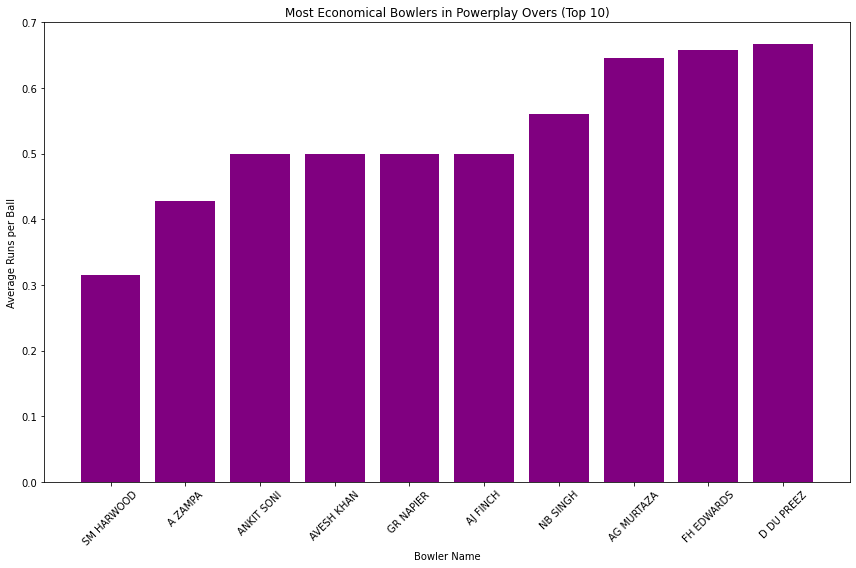

In [0]:
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='purple')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

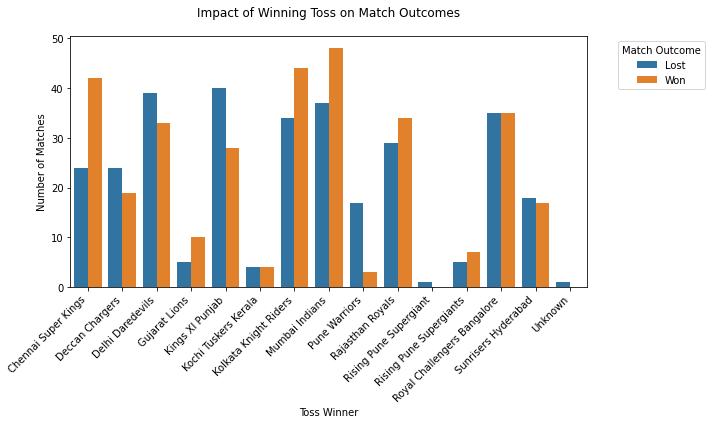

In [0]:

# Create the plot
plt.figure(figsize=(10, 6))
toss_impact_pd = toss_impact_individual_matches.toPandas()
# Create countplot with specified order of categories
ax = sns.countplot(data=toss_impact_pd, 
                  x='toss_winner',
                  hue='match_outcome',
                  order=sorted(toss_impact_pd['toss_winner'].unique()))  # Sort categories alphabetically

# Customize the plot
plt.title('Impact of Winning Toss on Match Outcomes', pad=20)
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # ha='right' helps align the rotated labels

# Adjust legend
plt.legend(title='Match Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

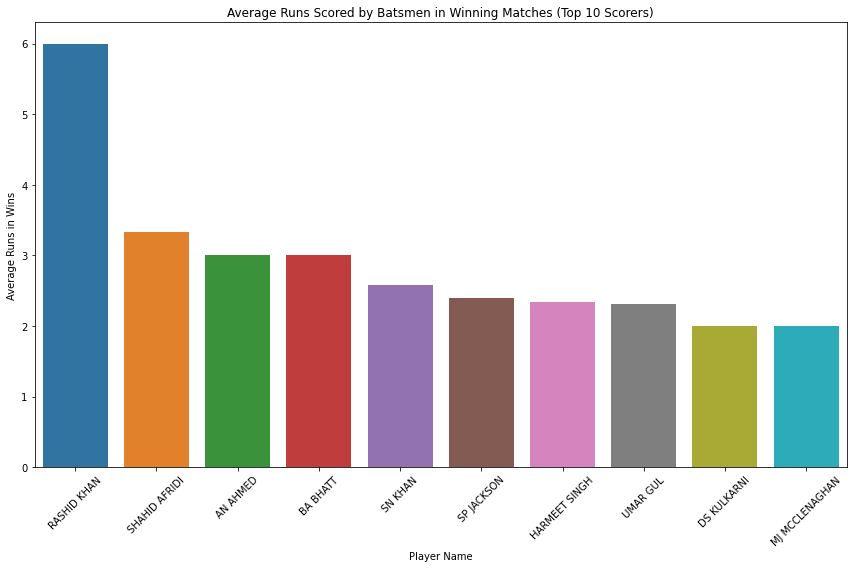

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [percentage_of_team_runs] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


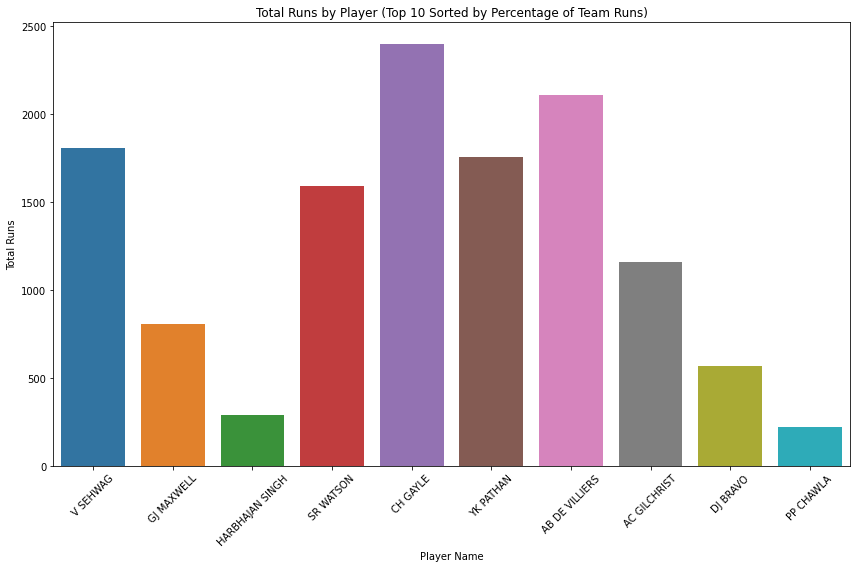

In [0]:


# Assuming 'percentage_runs_in_wins' is a PySpark DataFrame, convert it to a Pandas DataFrame
percentage_runs_in_wins_pd = percentage_runs_in_wins.toPandas()

# Sort the DataFrame based on percentage_of_team_runs and select the top 10 players
top_10_scorers = percentage_runs_in_wins_pd.sort_values(by='percentage_of_team_runs', ascending=False).head(10)

# Using seaborn to plot total runs in winning matches for the top 10 players
plt.figure(figsize=(12, 8))
sns.barplot(x='player_name', y='total_runs', data=top_10_scorers)
plt.title('Total Runs by Player (Top 10 Sorted by Percentage of Team Runs)')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


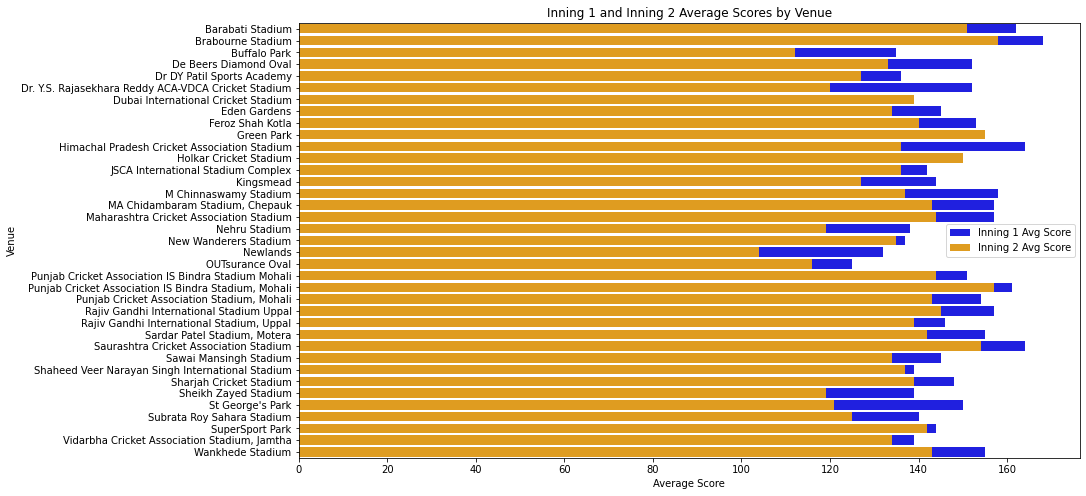

In [0]:
scores_by_venue_innings_pd = scores_by_venue_innings.toPandas()

# Plot Inning 1 avg score and Inning 2 avg score for each venue
plt.figure(figsize=(14, 8))
sns.barplot(x='Inng_1_avg', y='venue_name', data=scores_by_venue_innings_pd, color='blue', label='Inning 1 Avg Score')
sns.barplot(x='Inng_2_avg', y='venue_name', data=scores_by_venue_innings_pd, color='orange', label='Inning 2 Avg Score')

plt.title('Inning 1 and Inning 2 Average Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.legend()
plt.show()


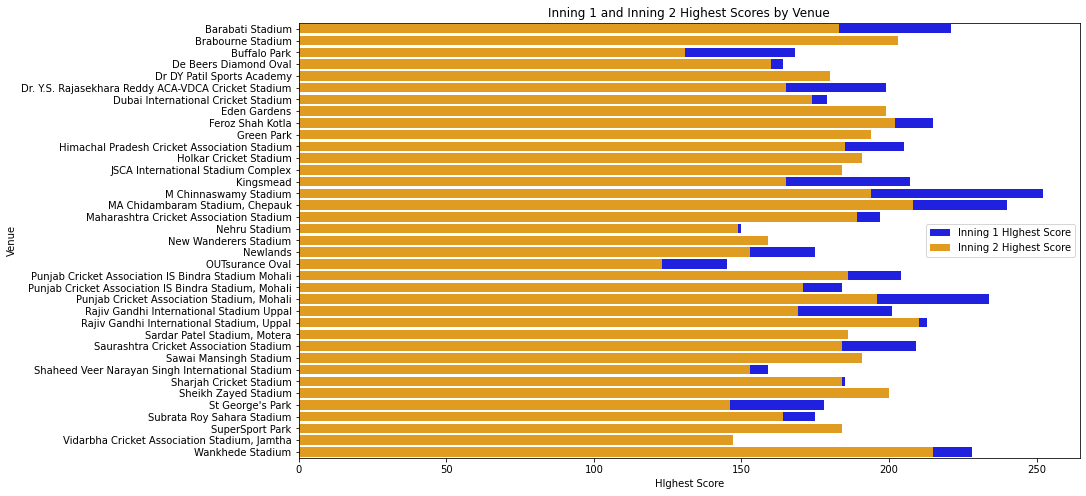

In [0]:
scores_by_venue_innings_pd = scores_by_venue_innings.toPandas()

# Plot Inning 1 HIghest score and Inning 2 Highest score for each venue
plt.figure(figsize=(14, 8))
sns.barplot(x='Inng_1_highest', y='venue_name', data=scores_by_venue_innings_pd, color='blue', label='Inning 1 HIghest Score')
sns.barplot(x='Inng_2_highest', y='venue_name', data=scores_by_venue_innings_pd, color='orange', label='Inning 2 Highest Score')

plt.title('Inning 1 and Inning 2 Highest Scores by Venue')
plt.xlabel('HIghest Score')
plt.ylabel('Venue')
plt.legend()
plt.show()

Use of MLIB Starts

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
from pyspark.sql.functions import col, when

# Create a new column 'is_captain' in player_match_df
player_match_df = player_match_df.withColumn("is_captain", when(col("player_captain") == col("player_name"), 1).otherwise(0))

# Create a new column 'is_keeper' in player_match_df
player_match_df = player_match_df.withColumn("is_keeper", when(col("player_keeper") == col("player_name"), 1).otherwise(0))

# Create a new column 'is_opposit_captain' in player_match_df
player_match_df = player_match_df.withColumn("is_opposit_captain", when(col("opposit_captain") == col("player_name"), 1).otherwise(0))

# Create a new column 'is_opposit_keeper' in player_match_df
player_match_df = player_match_df.withColumn("is_opposit_keeper", when(col("opposit_keeper") == col("player_name"), 1).otherwise(0))

# Show the updated DataFrame
player_match_df.show(5)


+---------------+--------+---------+-----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+---------------+--------------+---------------+-------------+--------------+----------+---------+------------------+-----------------+
|player_match_sk|match_id|player_id|player_name|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|age_as_on_match|player_captain|opposit_captain|player_keeper|opposit_keeper|is_captain|is_keeper|is_opposit_captain|is_opposit_keeper|
+---------------+--------+---------+-----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+---------------+--------------+---------------+-------------+--------------+----------+---------+------------------+-----------------+
|          12694|  335987|        6|   R Dravid|Right-hand bat|  Right-arm offbreak|       India|  Captain|Royal

In [0]:
from pyspark.sql.functions import col, when

# Check if the columns already exist
existing_columns = player_match_df.columns

# Index categorical columns if they don't already exist
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index").fit(player_match_df)
    for column in ["batting_hand", "bowling_skill", "country_name", "role_desc", "player_team", "opposit_team"]
    if column+"_index" not in existing_columns
]

# Apply the indexers
for indexer in indexers:
    player_match_df = indexer.transform(player_match_df)

# Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=["age_as_on_match", "is_captain", "is_keeper", "is_opposit_captain", "is_opposit_keeper",
               "batting_hand_index", "bowling_skill_index", "country_name_index", "role_desc_index",
               "player_team_index", "opposit_team_index"],
    outputCol="features"
)

data = assembler.transform(player_match_df)

# Select the features and label
data = data.select("features", "player_id")

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

# Initialize the LogisticRegression model
lr = LogisticRegression(labelCol="player_id", featuresCol="features", maxIter=10)

# Train the model
model = lr.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="player_id", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {accuracy:.2f}")
# Create a confusion matrix using the player_id column
# predictions.groupBy("player_id", "prediction").count().show()


Test Accuracy: 0.35


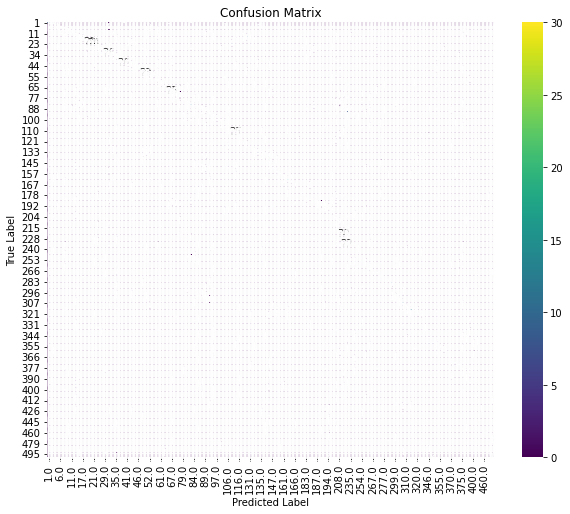

In [0]:


# Retrieve the confusion matrix data from the predictions DataFrame
confusion_matrix_data = predictions.groupBy("player_id", "prediction").count().toPandas()

# Pivot the DataFrame to create a confusion matrix
confusion_matrix = confusion_matrix_data.pivot(index="player_id", columns="prediction", values="count").fillna(0)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Calculate weighted precision
evaluator_precision = MulticlassClassificationEvaluator(labelCol="player_id", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)
print(f"Weighted Precision: {precision:.2f}")

# Calculate weighted recall
evaluator_recall = MulticlassClassificationEvaluator(labelCol="player_id", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)
print(f"Weighted Recall: {recall:.2f}")

# Calculate F1 score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="player_id", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print(f"F1 Score: {f1:.2f}")


# Calculate log loss
evaluator_log_loss = MulticlassClassificationEvaluator(labelCol="player_id", predictionCol="prediction", metricName="logLoss")
log_loss = evaluator_log_loss.evaluate(predictions)
print(f"Log Loss: {log_loss:.2f}")



Weighted Precision: 0.26
Weighted Recall: 0.35
F1 Score: 0.27
Log Loss: 3.49


In [0]:
# Rename the columns in player_match_df to avoid ambiguity
player_match_df = player_match_df.withColumnRenamed("country_name", "player_country_name") \
                                 .withColumnRenamed("season_year", "player_season_year")

# Rename the columns in match_df to avoid ambiguity
match_df = match_df.withColumnRenamed("country_name", "match_country_name") \
                   .withColumnRenamed("season_year", "match_season_year")

# Join player_match_df with match_df on match_id
player_match_details_df = player_match_df.join(match_df, player_match_df.match_id == match_df.match_id, "inner")

# Select relevant columns
player_match_details_df = player_match_details_df.select(
    "player_id", "player_name", "batting_hand", "bowling_skill", "player_country_name", "role_desc",
    "player_team", "opposit_team", "player_season_year", "age_as_on_match", "is_captain", "is_keeper",
    "is_opposit_captain", "is_opposit_keeper", "batting_hand_index", "bowling_skill_index",
    "country_name_index", "role_desc_index", "player_team_index", "opposit_team_index",
    "match_winner"
)

# Show the schema and a few rows of the joined dataframe
player_match_details_df.printSchema()
player_match_details_df.show(5)


root
 |-- player_id: integer (nullable = true)
 |-- player_name: string (nullable = true)
 |-- batting_hand: string (nullable = true)
 |-- bowling_skill: string (nullable = true)
 |-- player_country_name: string (nullable = true)
 |-- role_desc: string (nullable = true)
 |-- player_team: string (nullable = true)
 |-- opposit_team: string (nullable = true)
 |-- player_season_year: integer (nullable = true)
 |-- age_as_on_match: integer (nullable = true)
 |-- is_captain: integer (nullable = false)
 |-- is_keeper: integer (nullable = false)
 |-- is_opposit_captain: integer (nullable = false)
 |-- is_opposit_keeper: integer (nullable = false)
 |-- batting_hand_index: double (nullable = false)
 |-- bowling_skill_index: double (nullable = false)
 |-- country_name_index: double (nullable = false)
 |-- role_desc_index: double (nullable = false)
 |-- player_team_index: double (nullable = false)
 |-- opposit_team_index: double (nullable = false)
 |-- match_winner: string (nullable = true)

+----

In [0]:
indexer = StringIndexer(inputCol="match_winner", outputCol="label")
player_match_details_df = indexer.fit(player_match_details_df).transform(player_match_details_df)

# Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=["age_as_on_match", "is_captain", "is_keeper", "is_opposit_captain", "is_opposit_keeper",
               "batting_hand_index", "bowling_skill_index", "country_name_index", "role_desc_index",
               "player_team_index", "opposit_team_index"],
    outputCol="features"
)

data = assembler.transform(player_match_details_df)

# Select the features and label
data = data.select("features", "label")

# Show the schema and a few rows of the prepared data
data.printSchema()
data.show(5)

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,8,9,10],...|  2.0|
|(11,[0,9,10],[30....|  2.0|
|(11,[0,6,9,10],[2...|  2.0|
|(11,[0,6,7,9,10],...|  2.0|
|(11,[0,6,7,9,10],...|  2.0|
+--------------------+-----+
only showing top 5 rows



In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")

# Train the model
model = dt.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.48


In [0]:
features_df = player_match_df.select(
    "age_as_on_match", "batting_hand_index", "bowling_skill_index", "country_name_index",
    "role_desc_index", "player_team_index", "opposit_team_index"
)

# Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=["age_as_on_match", "batting_hand_index", "bowling_skill_index", "country_name_index",
               "role_desc_index", "player_team_index", "opposit_team_index"],
    outputCol="features"
)

data = assembler.transform(features_df)

# Show the schema and a few rows of the prepared data
data.printSchema()
data.show(5)


root
 |-- age_as_on_match: integer (nullable = true)
 |-- batting_hand_index: double (nullable = false)
 |-- bowling_skill_index: double (nullable = false)
 |-- country_name_index: double (nullable = false)
 |-- role_desc_index: double (nullable = false)
 |-- player_team_index: double (nullable = false)
 |-- opposit_team_index: double (nullable = false)
 |-- features: vector (nullable = true)

+---------------+------------------+-------------------+------------------+---------------+-----------------+------------------+--------------------+
|age_as_on_match|batting_hand_index|bowling_skill_index|country_name_index|role_desc_index|player_team_index|opposit_team_index|            features|
+---------------+------------------+-------------------+------------------+---------------+-----------------+------------------+--------------------+
|             35|               0.0|                0.0|               0.0|            1.0|              1.0|               3.0|[35.0,0.0,0.0,0.0...|
|  

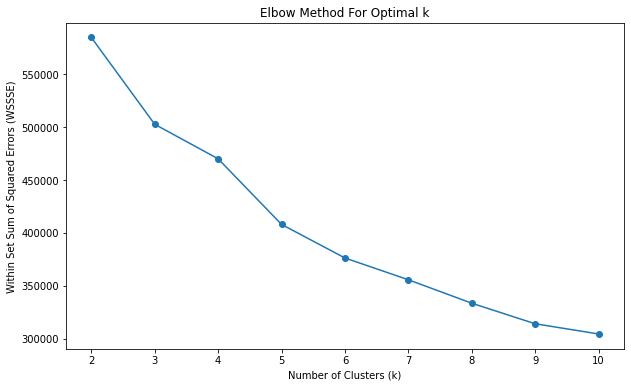

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

def calculate_wssse(data, k_values):
    wssse = []
    for k in k_values:
        kmeans = KMeans(featuresCol="features", k=k, seed=1234)
        model = kmeans.fit(data)
        wssse.append(model.summary.trainingCost)
    return wssse

# Define the range of k values to try
k_values = range(2, 11)

# Calculate WSSSE for each k value
wssse = calculate_wssse(data, k_values)

# Plot the WSSSE values to use the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wssse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [0]:

# Based on the elbow plot, choose the optimal k (for example, let's assume it's 3)
optimal_k = 3

# Initialize the KMeans model with the optimal k
kmeans = KMeans(featuresCol="features", k=optimal_k, seed=1234)

# Train the model
model = kmeans.fit(data)

# Make predictions
predictions = model.transform(data)

# Evaluate the model
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)

print(f"Silhouette Score: {silhouette:.2f}")

# Show the cluster centers
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette Score: 0.37
Cluster Centers: 
[33.68533212  0.25889821  2.04103378  1.35479483  0.42552709  4.08705509
  4.0952165 ]
[25.13452163  0.277727    1.722273    0.62370506  0.24482023  3.94835466
  4.06002438]
[27.5409347   0.36393769  8.26184952  1.21146835  0.11004309  4.40802121
  4.09115015]


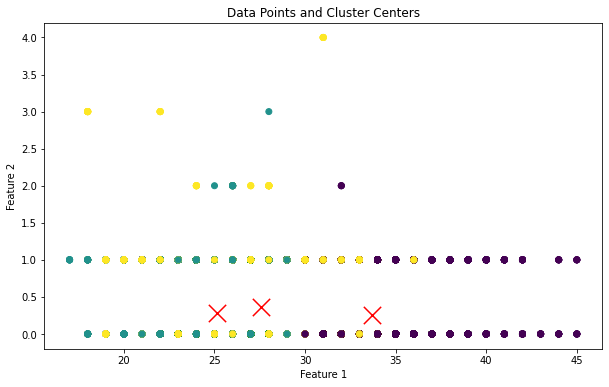

In [0]:
import numpy as np
def extract_features(row):
    return np.array(row.features)

data_points = np.array(data.select("features").rdd.map(extract_features).collect())
predicted_clusters = np.array(predictions.select("prediction").rdd.map(lambda row: row.prediction).collect())

# Plot all data points with their cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=predicted_clusters, cmap='viridis', marker='o')
plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], s=300, c='red', marker='x')  # Plot cluster centers
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Cluster Centers')
plt.show()